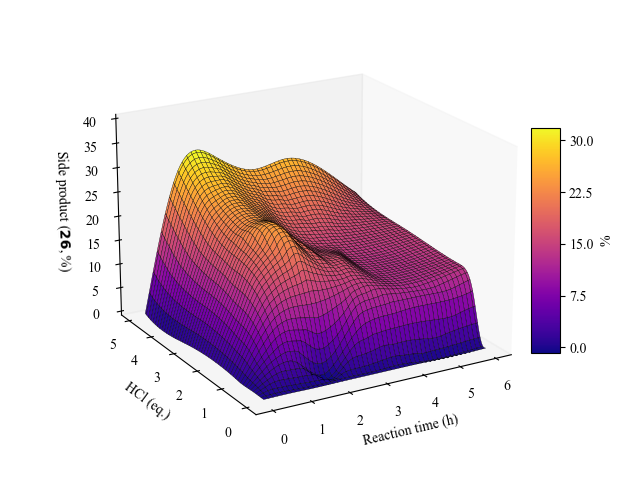

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate

n = 6 # nr experiments


df = pd.read_csv('rx_data.csv', delimiter=';', decimal=',', usecols=[
                 'molfrak. Pp', 'biprod', 'HCl (eq.) EtOH'])
df = df.replace(np.nan, 0)
bp = np.array(np.array_split(df['biprod'].to_numpy(), n))
eq = np.array([0, 0.1, 0.5,1,3,5])
t = np.array([0,1,2,3,4,6])
T, EQ = np.meshgrid(t, eq)
# Interpolering
tnew = np.linspace(0, 6, 100)
eqnew = np.linspace(0, 5, 100)
tnew, eqnew = np.meshgrid(tnew, eqnew)
znew = interpolate.griddata((T.flatten(), EQ.flatten()), bp.flatten(), (tnew, eqnew), method='cubic')

# Plott
csfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "Times New Roman"
c_style = 'plasma' #'YlGnBu' #'Wistia' #'viridis' #'magma'
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
hs_plott = ax.plot_surface(tnew, eqnew, 100*znew, cmap=c_style, edgecolor='k', linewidth=0.25, alpha=1, antialiased=True, shade=True)
cbar = fig.colorbar(hs_plott, shrink=0.5, aspect=8,pad= 0,ticks=np.linspace(0, 30, 5, endpoint=True))
cbar.set_ticks(np.linspace(0, 30, 5, endpoint=True))
cbar.set_label('%')
ax.set_xlabel('Reaction time (h)')
ax.set_ylabel('HCl (eq.)')
ax.set_zlabel('Side product $(\mathbf{26}, %)$')
ax.set_zlim(0, 40)
ax.view_init(20, -120)
ax.grid(False)


plt.tight_layout()
plt.show()

fig.savefig('surfaceplot_MH.png', dpi=400, bbox_inches='tight')